In [66]:
# import all .csv files in the current directory and merge them into one .csv file
import os
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]

#swap second and third cvs
csv_files[1], csv_files[2] = csv_files[2], csv_files[1]


# make seperate df for each csv file
dfs = [pd.read_csv(f) for f in csv_files]



In [67]:
for df in dfs:
    df.rename(columns={"Value": "Win Rate"}, inplace=True)


In [68]:
csv_files


batch_size = [file.split("sgd_minibatch_size=")[1].split("_")[0] for file in csv_files]
# extract the part that says "sgd_minibatch_size=..."
batch_size

['2048', '20000', '2048', '20000']

In [69]:
csv_files

['PPO_Coup_602b4_00000_0_sgd_minibatch_size=2048_2024-04-23_14-57-08.csv',
 'PPO_Coup_602b4_00002_2_sgd_minibatch_size=20000_2024-04-23_15-35-11.csv',
 'PPO_Coup_602b4_00001_1_sgd_minibatch_size=2048_2024-04-23_15-16-14.csv',
 'PPO_Coup_602b4_00003_3_sgd_minibatch_size=20000_2024-04-23_15-52-58.csv']

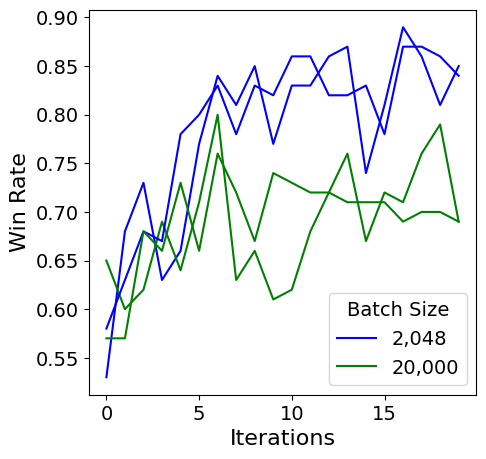

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

# set y axis between 0 and 1
#ax.set_ylim(0, 1)

# increase font size
plt.rcParams.update({'font.size': 14})

ax.set_xlabel("Iterations", fontsize=16)
ax.set_ylabel("Win Rate", fontsize=16)

colors = ['blue', 'green', 'blue', 'green']  # Define colors for each minibatch size


for i, df in enumerate(dfs):
    ax.plot(df['Win Rate'], label='Win Rate', color=colors[i])  # Use the corresponding color for each line

# custom legend. Title batchsize, and then 2048 is blue and 20,000 is green
# it should specifically ensure the colors are correct as it at the moment does blue and blue, since they were plotted this way
ax.legend(title="Batch Size", labels=['2,048', '20,000'])

# save as pdf
plt.savefig('batchsize.pdf', format='pdf', bbox_inches='tight')

# make sure it doesn't clip the labels
